## Linear regression

In [118]:
import numpy as np

%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [119]:
def linear_regression():
    # Step # 1 - Extract data
    points = np.genfromtxt('data.csv', delimiter=',')
    
    predictions = []
    b0, b1 = coefficients(points)
    for row in points:
        y_hat = b0 + b1 * row[0]
        predictions.append(y_hat)
    return predictions


def variance(mean, values):
    return sum([(x - mean) ** 2 for x in values])


def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar


def coefficients(dataset):
    var_x = [row[0] for row in dataset]
    var_y = [row[1] for row in dataset]
    mean_x, y_mean = np.mean(var_x), np.mean(var_y)
    b1 = covariance(var_x, mean_x, var_y, mean_y) / variance(mean_x, var_x)
    b0 = mean_y - b1 * mean_x
    return [b0, b1]


def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

## Plot Cost funstion

## Plot data and learned function

Root mean squared error is 10.50


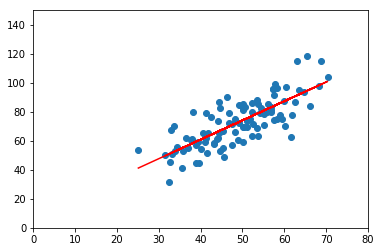

In [124]:
points = np.genfromtxt('data.csv', delimiter=',')
X = points[:, 0]
Y = points[:, 1]

plt.xlim(0, 80)
plt.ylim(0, 150)
plt.scatter(X, Y)

params = np.linspace(0, 150, 10)

predictions = linear_regression()
print('Root mean squared error is {:.2f}'.format(rmse_metric(Y, predictions)))
plt.plot(X, predictions, 'r')

plt.show()